In [1]:
!pip install fiona
import geopandas as gpd
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt
from fiona import listlayers

germanyMapsLink = "https://github.com/CienciaDeDatosEspacial/intro_geodataframe/raw/main/maps/worldMaps.gpkg"

# Cargar los datos de los países, ciudades y ríos
countries = gpd.read_file(germanyMapsLink, layer='countries')
cities = gpd.read_file(germanyMapsLink, layer='cities')
rivers = gpd.read_file(germanyMapsLink, layer='rivers')

# Seleccionar Alemania y proyectar a un CRS adecuado para cálculos geométricos
alemania = countries[countries.COUNTRY == 'Germany']
alemania_projected = alemania.to_crs(epsg=3068) # Código CRS para cálculos geométricos

# Capas en el mapa de alemania
listlayers(germanyMapsLink)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.6/56.6 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 16.7 MB/s eta 0:00:00


['indicators', 'countries', 'rivers', 'cities']

<Axes: >

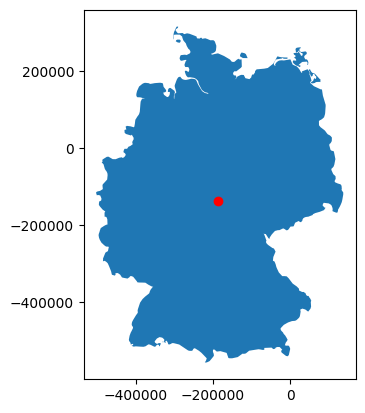

In [2]:
#Reproyeccion del mapa
alemania.to_crs(3068).crs.axis_info
alemania.to_crs(5641).centroid
base3068=alemania.to_crs(3068).plot()
# Ploteamos el mapa de Alemania
alemania.to_crs(3068).centroid.plot(color='red',ax=base3068)

In [3]:
# Importamos los estados y distritos
alemania_states=gpd.read_file('https://github.com/DiegoAntonio-web/introgeodf/raw/refs/heads/main/maps_alemania/germany_States_level_1.shp')
alemania_district=gpd.read_file('https://github.com/DiegoAntonio-web/introgeodf/raw/refs/heads/main/maps_alemania/germany_District_level_2.shp')

In [4]:
alemania_district.head()

,shape2,shapeiso,shapeid,shapegroup,shapetype,shape1,shape0,geometry
0,Stuttgart,None,9070358B86745718691241,DEU,ADM2,Baden-Wurttemberg,germany,"MULTIPOLYGON (((8.7689 48.52184, 8.76498 48.52..."
1,Karlsruhe,None,9070358B19876986675637,DEU,ADM2,Baden-Wurttemberg,germany,"MULTIPOLYGON (((9.41092 49.66351, 9.41106 49.6..."
2,Freiburg,None,9070358B61051204169762,DEU,ADM2,Baden-Wurttemberg,germany,"MULTIPOLYGON (((9.12593 47.66864, 9.12577 47.6..."
3,Tubingen,None,9070358B15022388296844,DEU,ADM2,Baden-Wurttemberg,germany,"POLYGON ((8.7689 48.52184, 8.76953 48.52369, 8..."
4,Oberbayern,None,9070358B1315543690610,DEU,ADM2,Bayern,germany,"POLYGON ((10.88629 47.53674, 10.88476 47.53751..."


In [5]:
import pandas as pd

#Capas de alemania
states = alemania_states
municipalities = alemania_district

# Agregamos la informacion de los aeropuertos
infoairports=pd.read_csv('https://github.com/DiegoAntonio-web/introgeodf/raw/refs/heads/main/data/airports.csv')
# Filtramos para tener los aeropuertos de Alemania
german_airports = infoairports[infoairports['iso_country'] == 'DE']
# Limpiamos los valores de coordenadas incoherentes
german_airports = german_airports[~german_airports['id'].isin([554300, 537347])]

airports = german_airports

In [ ]:
#Añadir puertos maritimos
import pandas as pd

portsFileLink = "Aqui iria la informacion sobre los puertos.csv"
# https://github.com/Control-ICDE/Trabajo-Grupal-6/blob/main/%7B2EA45F07-577E-4EA9-BBAC-ECD52217D28C%7D.png
# Enlace de la web: https://www.searates.com/es/maritime/germany

infoseaports = pd.read_csv(portsFileLink)

In [ ]:
# Organizando los nuevos datos
# Renombrar la columna ('Port Name' a 'portName' o como esten en la informacion que se tiene)
infoseaports.rename(columns={'Port Name': 'portName'}, inplace=True)
# Mantener solo algunas columnas relevantes y cambiar si hace falta
infoseaports = infoseaports.loc[:, ['portName', 'Country Code', 'Latitude', 'Longitude']]

# Mostrar información del DataFrame para asegurarse de que está correcto
print(infoseaports.info())

In [ ]:
# Reproyectando y manteniendo solo los puertos de Alemania
# Crear un GeoDataFrame con los puertos como puntos espaciales (sin proyectar)
seaports = gpd.GeoDataFrame(data=infoseaports.copy(),
                            geometry=gpd.points_from_xy(infoseaports.Longitude,
                                                        infoseaports.Latitude),
                            crs=3068)  # Sistema de coordenadas sin proyectar

# Filtrar los puertos de Alemania
seaports_de = seaports[seaports['Codigo pais'] == 'Alemania'].copy()  # 'DE' es el código de país de Alemania

# Resetear los índices para el DataFrame filtrado
seaports_de.reset_index(drop=True, inplace=True)

# Reproyectar los puertos de Alemania a un sistema de referencia proyectado
seaports_in_3068 = seaports_de.to_crs(3068)

NameError: name 'seaports_de_3068' is not defined

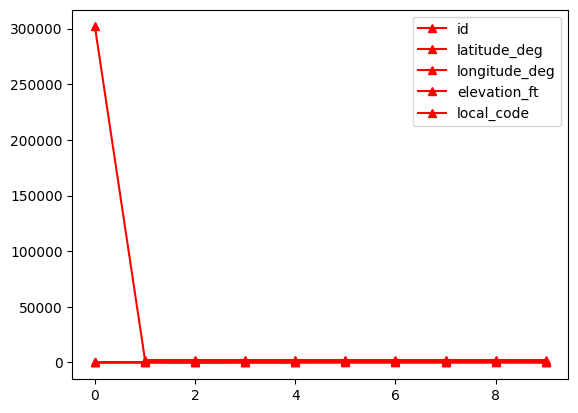

In [6]:
# Subconjunto de aeropuertos grandes
largeAirports = airports[airports['type'] == 'large_airport']
largeAirports.reset_index(drop=True, inplace=True)

# Graficando
base = largeAirports.plot(color='red', marker="^")
seaports_in_3068.plot(ax=base, alpha=0.5, markersize=3)
# Error en el codigo porque no hay data sobre los puertos

NameError: name 'seaports_de_24378' is not defined

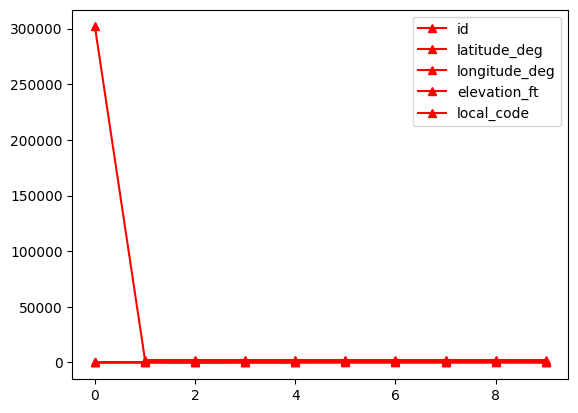

In [ ]:
# Graficando aeropuertos grandes
base = largeAirports.plot(color='red', marker="^", label='Aeropuertos grandes')
seaports_in_3068.plot(ax=base, alpha=0.5, markersize=3, label='Puertos marítimos de Alemania') # Mismo fallo aqui, no hay data

# Aeropuertos y puertos
base.set_title("Puertos marítimos y aeropuertos grandes en Alemania")
base.legend()

EJERCICIO 1

In [7]:
# Crear la matriz de distancias entre los puertos marítimos y los aeropuertos grandes
distanceMatrixKM_sea_air = seaports_in_3068.set_index('portName').geometry.apply(
                           (lambda g: largeAirports.set_index('NAME').geometry.distance(g)/1000).\
                            sort_index(axis=0).sort_index(axis=1)

SyntaxError: incomplete input (<ipython-input-7-204671c89b37>, line 4)

In [ ]:
distanceMatrixKM_sea_air

In [8]:
# Seleccionar un puerto y ordenar las distancias a los aeropuertos de menor a mayor
distanceMatrixKM_sea_air.loc['Frankfurt Airport', :].sort_values(ascending=True)

NameError: name 'distanceMatrixKM_sea_air' is not defined

In [ ]:
# Obtener las dos distancias más cercanas
closest_airports = distanceMatrixKM_sea_air.loc['Frankfurt Airport', :].sort_values(ascending=True).head(2)

# Seleccionar los aeropuertos más cercanos del DataFrame de aeropuertos usando los índices
Closest_Air = airports.loc[closest_airports.index, :]
Closest_Air

In [ ]:
!pip install mapclassify

In [ ]:
# Crear el mapa base con los dos aeropuertos más cercanos en rojo
base = Closest_Air.explore(color='red', marker_kwds=dict(radius=10))

seaports_in_3068[seaports_in_3068.portName.str.contains('Frankfurt Airport')].explore(m=base, marker_kwds=dict(radius=10))

EJERCICIO 2

,NAME,SYSTEM,geometry
14,Danube,None,"MULTILINESTRING ((8.73734 47.99981, 9.56016 48..."
61,Rhine,None,"MULTILINESTRING ((6.42693 51.85182, 6.88766 51..."


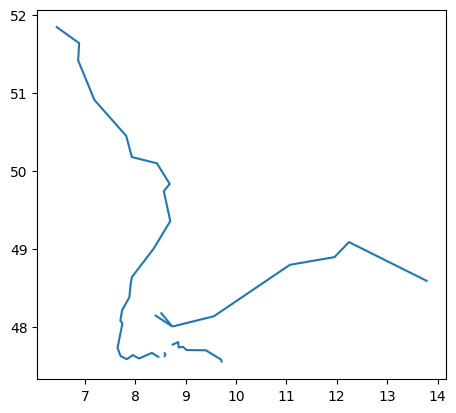

In [9]:
# Sacamos la informacion de los rios
riversGermany_clipped=gpd.clip(rivers,alemania)
gpd.clip(rivers,alemania).plot()
riversGermany_clipped

In [10]:
# Sacamos el río mas grande de Alemania
Rhine = rivers[rivers.NAME.str.contains('Rhine')]

In [11]:
# Calculando la matriz de distancias entre el rio mas grade y los aeropuertos grandes en km
Rhine_filtered = Rhine[Rhine.NAME.str.contains('Rhine')]
distanceMatrixKM_Rhine_air = (
    Rhine_filtered.set_index('NAME').geometry.apply(
        lambda g: largeAirports.set_index('Frankfurt Airport').geometry.distance(g) / 1000
    )
    .sort_index(axis=0)
    .sort_index(axis=1)
)
# Ver la matriz de distancias
distanceMatrixKM_Rhine_air   #cambiar "Nomb_rio", por el rio mas grande de alemania

KeyError: "None of ['Frankfurt Airport'] are in the columns"

In [ ]:
# Ordenar las distancias entre el Nomb_rio y los aeropuertos más cercanos en Alemania
distanceMatrixKM_Nomb_rio_air.iloc[0,:].sort_values(axis=0, ascending=True)   #cambiar "Nomb_rio", por el rio mas grande de alemania

In [ ]:
distanceMatrixKM_Nomb_rio_air.idxmin(axis=1)
distanceMatrixKM_Nomb_rio_air.idxmax(axis=1)

In [ ]:
# Seleccionar el aeropuerto más cercano y el más lejano a partir de la matriz de distancias
Closest_Air = airports.loc[distanceMatrixKM_Ganges_air.iloc[0,:].idxmin(), :]
Far_Air = airports.loc[distanceMatrixKM_Ganges_air.iloc[0,:].idxmax(), :]

Closest_Air, Far_Air

In [ ]:
# Seleccionar el primer y último aeropuerto de la lista
base = Clos_Far_Air.explore(color='red', marker_kwds=dict(radius=10))

# Visualizar el río Ganges en el mapa
rivers[rivers.NAME.str.contains('Rhine')].explore(m=base)

EJERCICIO 3


,NAME,SYSTEM,geometry
14,Danube,None,"MULTILINESTRING ((8.73734 47.99981, 9.56016 48..."
61,Rhine,None,"MULTILINESTRING ((6.42693 51.85182, 6.88766 51..."


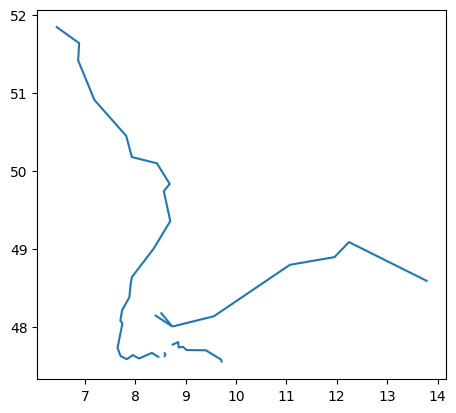

In [20]:
# Pasamos nuestro sistema de rios
# No ubicamos informacion de manera gratuita en internet, solo habia de pago
# https://data.nextgis.com/es/region/DE/base/
gpd.clip(rivers,alemania).plot()
riversGermany_clipped

In [21]:
#Combinamos los rios de los datos geoespaciales creando un nuevo GeoDataFrame
systems=riversGermany_clipped.dissolve(by='NAME')
systems

,geometry,SYSTEM
NAME,,
Danube,"MULTILINESTRING ((8.73734 47.99981, 9.56016 48...",None
Rhine,"MULTILINESTRING ((6.42693 51.85182, 6.88766 51...",None


In [22]:
# Reseteamos los datos para tenerlos listos para trabajar
systems.reset_index(drop=False,inplace=True)

<Axes: >

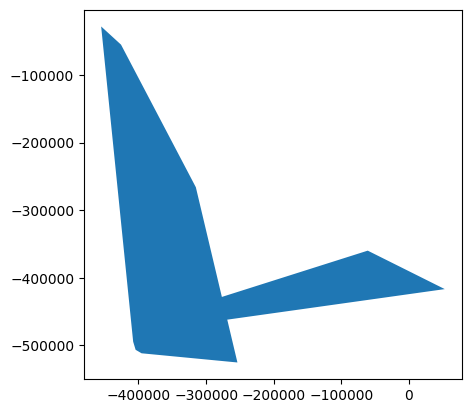

In [23]:
# Reproyectamos las cuencas con el CRS de alemania para generar los convex hulls
systems_3068 = systems.to_crs(3068)
systems_3068.convex_hull.plot()
# Como solo tenemos dos valores nos quedamos con estos valores para trabajar

In [25]:
# Generamos un nuevo GeoDataFrame con el convex hull system
systems_hulls = systems_3068.convex_hull.to_frame()
systems_hulls['system'] = ['Danube', 'Rhine']
systems_hulls.rename(columns={0: 'geometry'}, inplace=True)
systems_hulls = systems_hulls.set_geometry('geometry')
systems_hulls.crs = "EPSG:3068"

In [ ]:
# Calculo de las distancias entre sistems_hulls y large airports
distanceMatrixKM_sysHull_air = systems_hulls.set_index('system').geometry.apply(
    lambda g: largeAirports.set_index('name').geometry.distance(g) / 1000
).sort_index(axis=0).sort_index(axis=1)

AttributeError: 'DataFrame' object has no attribute 'geometry'

In [ ]:
# Definimos que aeropuerto se encuentra mas cerca o lejos de las cuencas
mins = distanceMatrixKM_systemsHull_air.idxmin(axis="columns")
maxs = distanceMatrixKM_systemsHull_air.idxmax(axis="columns")
# Ploteamos la informacion con la geometria de los convex hullbase = systems_hulls.explore()
largeAirports[largeAirports.name.isin(mins)].explore(m=base, color='green', marker_kwds=dict(radius=10))
largeAirports[largeAirports.name.isin(maxs)].explore(m=base, color='red', marker_kwds=dict(radius=10))

largeAirports[~largeAirports.name.isin(mins)][~largeAirports.name.isin(maxs)].explore(m=base, color='blue', marker_kwds=dict(radius=5))

EJERCICIO 4